In [1]:
import pandas as pd
from pandas.io.json import json_normalize 
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Below import will allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
dkdata = pd.read_json('dkdata.json')
dkdata.head(5)

,data
0,{'payer_name': 'AZARBAYCAN METANOL KOMPANI MMC...
1,"{'payer_name': 'LCM ALLIANCE LLP', 'payer_juri..."
2,{'payer_name': 'SKN ELECTRICAL SERVICES LIMITE...
3,"{'payer_name': 'METASTAR INVEST LLP', 'payer_j..."
4,"{'payer_name': 'METASTAR INVEST LLP', 'payer_j..."


In [3]:
# Convert that column into a 'normalized' DataFrame with json_normalize
dkdata = json_normalize(dkdata['data']) 

In [4]:
dkdata.head()

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,...,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
0,AZARBAYCAN METANOL KOMPANI MMC,AZ,33817018409333311204,pdf/LCM ALLIANCE Account statement 30.06.12-31...,535470.00,6049,Company,True,USD,LCM ALLIANCE LLP,...,LCM ALLIANCE LLP,False,EE27 3300 3335 0561 0002,1206295100052180 OCT4121800021 ADVANCE PAYM FO...,2012-06-30,535470,"$431,762.31",Company,AZARBAYCAN METANOL KOMPANI MMC,33
1,LCM ALLIANCE LLP,GB,EE27 3300 3335 0561 0002,pdf/LCM ALLIANCE Account statement 30.06.12-31...,-535000.00,6050,Company,False,USD,MOBILA LLP,...,MOBILA LLP,True,333504500003,1207035026699176 INVOICE.No 6215 DD 25.05.2012,2012-07-03,535000,"$423,688.44",Company,LCM ALLIANCE LLP,EE
2,SKN ELECTRICAL SERVICES LIMITEDACCO,GB,20100374548222,pdf/METASTAR Account statement 30.06.12-31.12....,90535.19,10623,Company,True,USD,METASTAR INVEST LLP,...,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,"1207065103089249 /FEE/USD4,81",2012-07-06,90536,"$71,698.53",Company,SKN ELECTRICAL SERVICES LIMITED,20
3,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,-90520.00,15589,Company,False,USD,INMAXO CAPITAL CORP,...,INMAXO CAPITAL CORP.,True,333455870002,1207095022358525 DOGOVOR ZAYMA,2012-07-09,90520,"$71,686.50",Company,METASTAR INVEST LLP,EE
4,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,-60.00,10624,Company,False,USD,INMAXO CAPITAL CORP,...,INMAXO CAPITAL CORP.,True,333455870002,1207135024578077 DOGOVOR ZAYMA,2012-07-13,60,$47.52,Company,METASTAR INVEST LLP,EE


In [5]:
print(f"The dataset contains {len(dkdata)} transactions")

The dataset contains 16940 transactions


In [6]:
pd.options.display.max_columns = 50

### Profiling

In [7]:
pd.options.display.float_format = "{:.2f}".format
dkdata.describe()

,amount_orig,id,amount_usd
count,16940.00,16940.00,16940.00
mean,-17236.91,8470.50,360068.35
std,905089.41,4890.30,729466.61
min,-14603481.92,1.00,1.00
25%,-147107.75,4235.75,21022.75
50%,-25890.82,8470.50,92867.00
75%,-503.75,12705.25,361142.00
max,20559970.00,16940.00,20559970.00


There were 368 different legal entities/person to pay and 3435 legal entities/person who ultimately received money. Among those, most of the transactions involved clients in GB (Britain) (nearly 89%). <br>
2013-06-12 saw the highest number of transactions - 114 records. 

In [8]:
dkdata.describe(include=['O', 'bool'])

,payer_name,payer_jurisdiction,payer_account,source_file,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_eur,payer_type,payer_name_norm,payer_bank_country
count,16940,16940,16825,16940,16940,16940,16940,16940,16940,16940,16936,16940,16940,16936,16940,16940,16940,16940,16940,16825
unique,437,43,368,6,3,2,6,3553,84,1,147,3185,2,3435,15933,645,10992,3,395,49
top,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/METASTAR Account statement 30.06.12-31.12....,Company,False,USD,LCM ALLIANCE LLP,GB,az,EE,LCM ALLIANCE LLP,True,EE27 3300 3335 0561 0002,OWN PAYMENT,2013-06-12,"$20,000.00",Company,HILUX SERVICES LP,EE
freq,5178,15074,5056,4931,15998,12607,12032,1758,8273,16940,5510,1758,13188,1708,129,114,84,16877,5178,13147


In [9]:
#show the currency amount in the transaction
dkdata.groupby(['amount_orig_currency'])['amount_orig_currency'].count()

amount_orig_currency
CHF       71
EUR     4554
GBP      126
RUB      155
SEK        2
USD    12032
Name: amount_orig_currency, dtype: int64

In [10]:
dkdata[['payer_account', 'beneficiary_account']].agg(['nunique', 'count']).T

,nunique,count
payer_account,368,16825
beneficiary_account,3435,16936


### Cleansing

#### Convert amount_eur to float - currently it is a string.

In [11]:
dkdata['amount_eur'] = dkdata['amount_eur'].str.replace('$','')
dkdata['amount_eur'] = dkdata['amount_eur'].str.replace(',','')
dkdata['amount_eur'] = dkdata['amount_eur'].astype(float)


#### Covert amount_orig to positive number

In [12]:
dkdata['amount_orig'] = dkdata['amount_orig'].abs()

#### Clean jurisdiction data

In [13]:
dkdata['beneficiary_jurisdiction'].unique()

array(['GB', 'VG', 'NZ', 'IT', 'UNKNOWN', 'TR', 'DE', 'US', 'RU', 'AE',
       'GE', 'PA', 'SE', 'UA', 'CN', 'PL', 'CY', 'ES', 'HK', 'SG', 'SI',
       'JP', 'CH', 'LU', 'CZ', 'BY', 'AZ', 'BE', 'LV', 'NL', 'KR', 'RO',
       'BG', 'IE', 'NR', 'AT', 'MK', 'FI', 'SK', 'FR', 'ID', 'TG', 'HU',
       'KZ', 'PT', 'UZ', 'DK', 'IN', 'LR', 'TM', 'RS', 'CA', 'MY', 'LI',
       'EE', 'AU', 'LT', 'TW', 'MD', 'IM', 'IL', 'MV', 'CO', 'EC', 'CN\n',
       'ZA', 'AI', 'PH', 'GR', 'TH', 'BR', 'LK', 'KW', 'BM', 'VN', 'KG',
       'MT', 'HR', 'ME', 'SC', 'MN', 'LB', 'DM', 'JE'], dtype=object)

In [14]:
dkdata['beneficiary_jurisdiction'] = dkdata['beneficiary_jurisdiction'].replace('CN\n', 'CN')
dkdata['beneficiary_jurisdiction'] = dkdata['beneficiary_jurisdiction'].replace('UNKNOWN', np.nan)
dkdata['beneficiary_jurisdiction'].unique()

array(['GB', 'VG', 'NZ', 'IT', nan, 'TR', 'DE', 'US', 'RU', 'AE', 'GE',
       'PA', 'SE', 'UA', 'CN', 'PL', 'CY', 'ES', 'HK', 'SG', 'SI', 'JP',
       'CH', 'LU', 'CZ', 'BY', 'AZ', 'BE', 'LV', 'NL', 'KR', 'RO', 'BG',
       'IE', 'NR', 'AT', 'MK', 'FI', 'SK', 'FR', 'ID', 'TG', 'HU', 'KZ',
       'PT', 'UZ', 'DK', 'IN', 'LR', 'TM', 'RS', 'CA', 'MY', 'LI', 'EE',
       'AU', 'LT', 'TW', 'MD', 'IM', 'IL', 'MV', 'CO', 'EC', 'ZA', 'AI',
       'PH', 'GR', 'TH', 'BR', 'LK', 'KW', 'BM', 'VN', 'KG', 'MT', 'HR',
       'ME', 'SC', 'MN', 'LB', 'DM', 'JE'], dtype=object)

In [15]:
dkdata['payer_bank_country'] = dkdata['payer_bank_country'].fillna(np.nan)
dkdata['payer_bank_country'].unique()

array(['33', 'EE', '20', nan, 'LV', 'CH', 'CY', 'TR', 'BE', 'NL', '10',
       'LI', '06', '38', '40', '00', 'DK', 'DE', 'KZ', 'MT', '39', 'CZ',
       '01', 'AE', '35', 'TX', 'AZ', 'MD', 'NR', 'OS', 'TA', '50', '41',
       'GE', '36', '26', '11', 'RO', '55', '60', 'FR', 'BG', 'LT', '90',
       '12', 'IT', '66', 'QA', '87', 'LU'], dtype=object)

In [16]:
dkdata.groupby('date')['amount_usd'].sum().nlargest(5)

date
2013-11-28    40870127
2013-06-06    34397151
2013-11-25    32869474
2014-10-10    32269381
2013-06-12    32171514
Name: amount_usd, dtype: int64

### Time series

Text(0.5, 0, 'Timeline')

Text(0, 0.5, 'Transaction amounts (in 0000000s $)')

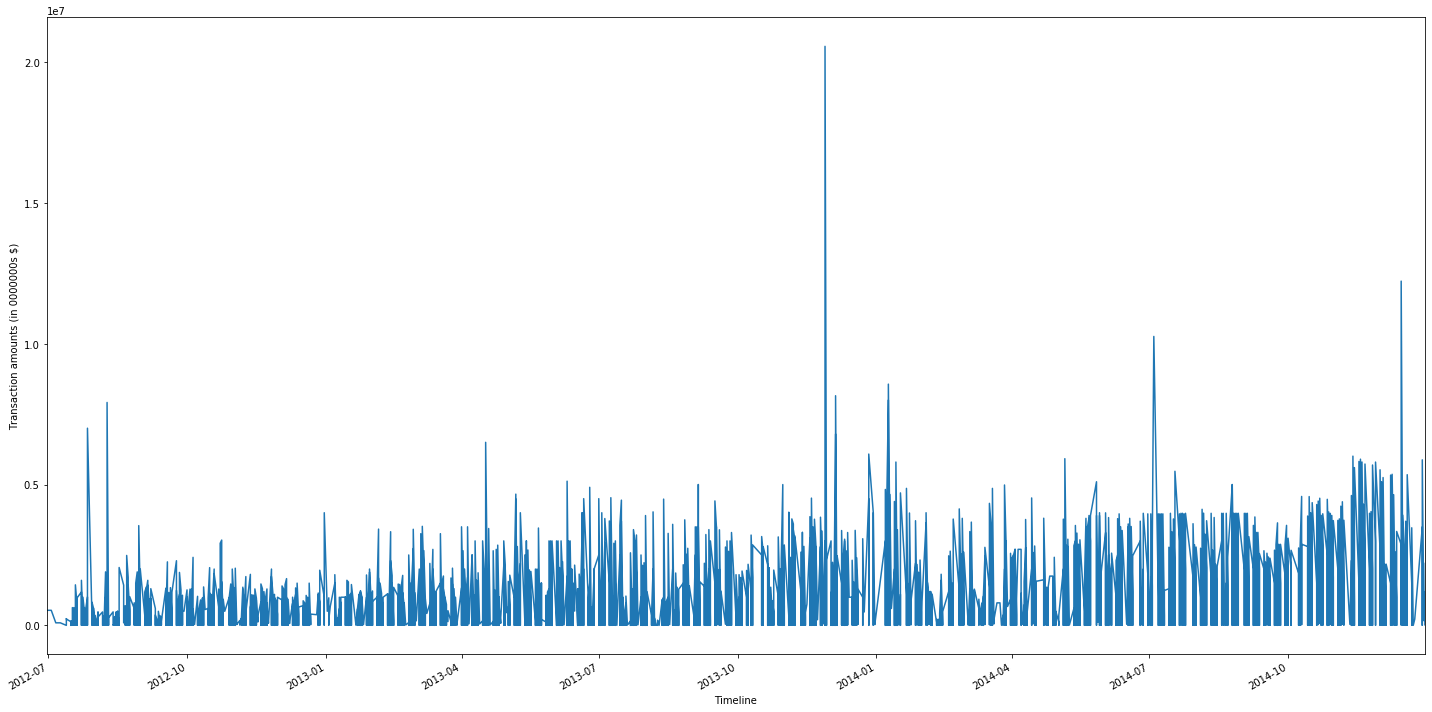

In [17]:
dkdata['date'] = pd.to_datetime(dkdata['date'])
dk_ = pd.Series(dkdata['amount_usd'].values, index=dkdata.date)
dk_.plot(legend=False, figsize=[20, 10])
plt.xlabel('Timeline')  
plt.ylabel('Transaction amounts (in 0000000s $)') 
plt.tight_layout()
plt.show()

In [18]:
tsdf = dkdata.set_index('date')
tsdf.head(1)

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
date,,,,,,,,,,,,,,,,,,,,,,
2012-06-30,AZARBAYCAN METANOL KOMPANI MMC,AZ,33817018409333311204,pdf/LCM ALLIANCE Account statement 30.06.12-31...,535470.00,6049,Company,True,USD,LCM ALLIANCE LLP,GB,az,EE,LCM ALLIANCE LLP,False,EE27 3300 3335 0561 0002,1206295100052180 OCT4121800021 ADVANCE PAYM FO...,535470,431762.31,Company,AZARBAYCAN METANOL KOMPANI MMC,33


In [19]:
tsdf.nlargest(10, ['amount_usd'])

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
date,,,,,,,,,,,,,,,,,,,,,,
2013-11-28,SECURO LTD.,UNKNOWN,NL11ATBA0802866001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,20559970.00,1604,Company,True,USD,HILUX SERVICES LP,GB,az,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1311275108326781 SUPPLY CONTRACT AZ/256/2013 I...,20559970,15180865.05,Company,SECURO LTD.,NL
2014-12-15,SECURO LIMITED,GB,LU450825017019781001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,9800000.00,1044,Company,True,EUR,HILUX SERVICES LP,GB,az,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1412125105574718 /INV/001/934 DATE 10.12.2014,12223552,9800000.00,Company,SECURO LIMITED,LU
2014-07-04,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,7500000.00,651,Company,False,EUR,FABERLEX LP,GB,az,EE,FABERLEX LP,True,EE683300333516210006,PAYMENT TO THE CONTRACT N 5 DD.02.12.2013,10259357,7500000.00,Company,HILUX SERVICES LP,EE
2014-07-04,ARASH MEDICAL PRODUCTION LTD,AZ,LV69AIZK0001140063593,pdf/HILUX Account statement 30.06.12-31.12.14.xml,7500000.00,650,Company,True,EUR,HILUX SERVICES LP,GB,az,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1407035107325514 PAYMENT FOR EQUIPMENT CONTRAC...,10259357,7500000.00,Company,ARASH MEDICAL PRODUCTION LTD,LV
2014-01-09,MODIAR,AZ,TXID/AZ/1700986181,pdf/HILUX Account statement 30.06.12-31.12.14.xml,8565906.50,14134,Company,True,USD,HILUX SERVICES LP,GB,az,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1401085101288436 INV HS-04/02-36 26 12 13 FULL...,8565907,6227148.48,Person,MODIAR,TX
2013-12-05,ARASH MEDICAL PRODUCTION LTD,AZ,LV69AIZK0001140063593,pdf/HILUX Allegato 4.xml,6000000.00,4349,Company,True,EUR,HILUX SERVICES LP,GB,az,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1312045105228931 FOR MEDICAL EQUIPMENT AGREEME...,8154113,6000000.00,Company,ARASH MEDICAL PRODUCTION LTD,LV
2014-01-09,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,8000000.00,1876,Company,False,USD,KG COMMERCE LLP,GB,az,EE,KG COMMERCE LLP,True,EE333300333505590009,1401095076846464 PAYMENT TO THE CONTRACT N 333...,8000000,5815752.00,Company,HILUX SERVICES LP,EE
2012-08-09,JETFIELD NETWORKS LIMITED,NZ,333488110001,pdf/METASTAR Account statement 30.06.12-31.12....,7915400.00,10730,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208095025633675 INV.333 DD 30.06.2012,7915400,6455689.42,Company,JETFIELD NETWORKS LIMITED,33
2012-07-27,JETFIELD NETWORKS LIMITED,NZ,333488110001,pdf/METASTAR Account statement 30.06.12-31.12....,7000800.00,10684,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1207275026111230 INV.333 DD 30.06.2012,7000800,5544220.55,Company,JETFIELD NETWORKS LIMITED,33


In [20]:
a = tsdf[tsdf['payer_name_norm'] == tsdf['beneficiary_name_norm']]
a

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country
date,,,,,,,,,,,,,,,,,,,,,,
2013-06-05,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1070000.00,11848,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306045102956800 REPLENISHMENT OF OWN ACCOUNT,1070000,823686.00,Company,METASTAR INVEST LLP,LV
2013-06-06,METASTAR INVEST LLP CORNWALL BUILD.,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1004150.00,10121,Company,True,EUR,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306065105639260 REPLENISHMENT OF OWN ACCOUNT,1304430,1004150.00,Company,METASTAR INVEST LLP,LV
2013-06-07,METASTAR INVEST LLP CORNWALL BUILD.,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,95995.00,10128,Company,True,EUR,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306075100483118 REPLENISHMENT OF OWN ACCOUNT,124702,95995.00,Company,METASTAR INVEST LLP,LV
2013-06-07,METASTAR INVEST LLP CORNWALL BUILD.,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,155300.00,10127,Company,True,EUR,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306075102245734 REPLENISHMENT OF OWN ACCOUNT,201741,155300.00,Company,METASTAR INVEST LLP,LV
2013-06-07,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1210000.00,11864,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1306065105233024 REPLENISHMENT OF OWN ACCOUNT,1210000,931458.00,Company,METASTAR INVEST LLP,LV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,589974.00,12685,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1405205106438991 REPLENISHMENT OF OWN ACCOUNT ...,589974,425386.59,Company,METASTAR INVEST LLP,LV
2014-05-22,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,914974.00,12687,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1405215103364157 REPLENISHMENT OF OWN ACCOUNT ...,914974,659720.04,Company,METASTAR INVEST LLP,LV
2014-05-30,METASTAR INVEST LLP,GB,LV37CBBR1121885100010,pdf/METASTAR Account statement 30.06.12-31.12....,1000000.00,12690,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1405295107720503 REPLENISHMENT OF OWN ACCOUNT,1000000,721026.00,Company,METASTAR INVEST LLP,LV


,payer_name_norm,beneficiary_name_norm,amount_eur,day of the week
date,,,,
2012-06-30,AZARBAYCAN METANOL KOMPANI MMC,LCM ALLIANCE LLP,431762.31,Saturday
2012-07-03,LCM ALLIANCE LLP,MOBILA LLP,423688.44,Tuesday
2012-07-06,SKN ELECTRICAL SERVICES LIMITED,METASTAR INVEST LLP,71698.53,Friday
2012-07-09,METASTAR INVEST LLP,INMAXO CAPITAL CORP.,71686.50,Monday
2012-07-13,METASTAR INVEST LLP,INMAXO CAPITAL CORP.,47.52,Friday


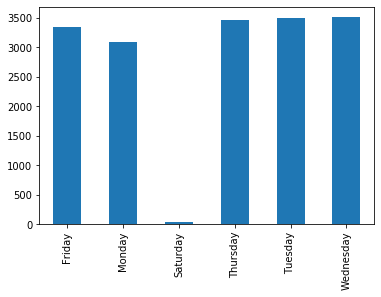

In [21]:
tsdf['day of the week'] = tsdf.index.weekday_name
tsdf[['payer_name_norm', 'beneficiary_name_norm', 'amount_eur', 'day of the week']].head()
tsdf['day of the week'].value_counts().sort_index().plot.bar(x='day of the week')

### Transaction insight

In [22]:
dkdata['transaction_direction'] = np.where(
    np.logical_and(dkdata['beneficiary_core']==True,dkdata['payer_core']==True),'Internal Routing',np.where(
        dkdata['payer_core']==True,'Outgoing Transaction','Incoming Transaction'))
dkdata['transaction_direction'].value_counts()

Outgoing Transaction    12607
Incoming Transaction     3752
Internal Routing          581
Name: transaction_direction, dtype: int64

In [23]:
#counted transactions.
dup_trans = dkdata[dkdata.duplicated(subset=['amount_usd','date','payer_name_norm','beneficiary_name_norm'])]
#There seem to be 342 such transactions which have been recorded twice
dkdata['duplicated_transaction'] = np.where(dkdata['id'].isin(dup_trans['id'].values),1,0)
dkdata[dkdata['duplicated_transaction']==1]

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country,transaction_direction,duplicated_transaction
96,METASTAR INVEST LLP,GB,EE77 3300 3334 8704 0004,pdf/METASTAR Account statement 30.06.12-31.12....,50000.00,10664,Company,False,USD,LOTA SALES LLP,GB,az,33,LOTA SALES LLP,True,333484540002,1207235027678424 DOGOVOR ZAYMA,2012-07-23,50000,39597.05,Company,METASTAR INVEST LLP,EE,Outgoing Transaction,1
292,LOTA SALES LLP,GB,333484540002,pdf/METASTAR Account statement 30.06.12-31.12....,10000.00,15644,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,False,EE77 3300 3334 8704 0004,1208095024427907 DOGOVOR ZAYMA,2012-08-09,10000,8155.86,Company,LOTA SALES LLP,33,Incoming Transaction,1
385,LCM ALLIANCE LLP,GB,333505610002,pdf/METASTAR Account statement 30.06.12-31.12....,373660.00,10763,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1208225026908368 INVOICE.No 7458 DD 02.08.2012,2012-08-22,373660,304751.86,Company,LCM ALLIANCE LLP,33,Internal Routing,1
496,LCM ALLIANCE LLP,GB,333505610002,pdf/METASTAR Account statement 30.06.12-31.12....,406117.00,10792,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1208295025932744 INVOICE.No 7458 DD 02.08.2012,2012-08-29,406117,331223.34,Company,LCM ALLIANCE LLP,33,Internal Routing,1
515,LCM ALLIANCE LLP,GB,333505610002,pdf/METASTAR Account statement 30.06.12-31.12....,600000.00,10798,Company,True,USD,METASTAR INVEST LLP,GB,az,EE,METASTAR INVEST LLP,True,EE77 3300 3334 8704 0004,1208305023978591 INVOICE.No 7458 DD 02.08.2012,2012-08-30,600000,489351.60,Company,LCM ALLIANCE LLP,33,Internal Routing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15463,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,300000.00,3489,Company,False,USD,NORDLAND DEVELOPMENT LLP,GB,az,EE,NORDLAND DEVELOPMENT LLP,True,EE923300333509480005,1409225077260911 PAYMENT TO THE CONTRACT N.S-2...,2014-09-22,300000,228497.10,Company,HILUX SERVICES LP,EE,Outgoing Transaction,1
15621,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,1000000.00,3582,Company,False,USD,OVERMOND LLP,GB,az,EE,OVERMOND LLP,True,EE163300333505930009,1409295074444507 PAYMENT TO THE CONTRACT N.11/...,2014-09-29,1000000,761657.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,1
15809,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,2000000.00,3678,Company,False,USD,OVERMOND LLP,GB,az,EE,OVERMOND LLP,True,EE163300333505930009,1410105073283546 PAYMENT TO THE CONTRACT N.11/...,2014-10-10,2000000,1584894.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,1
15828,BAKTELEKOM MMC,AZ,AZ18IBAZ40150018404004037267,pdf/HILUX Allegato 4.xml,2741896.50,5214,Company,True,USD,HILUX SERVICES LP,GB,az,EE,HILUX SERVICES LP,False,EE12 3300 3335 1615 0001,1410105100568864 CONTRAKT N22 22.09.2014 /FEE...,2014-10-10,2741897,2172807.66,Company,BAKTELEKOM MMC,AZ,Incoming Transaction,1


In [24]:
#focus on where the money goes (beneficiary) when there is no payer account

series_to_plot = dkdata.loc[dkdata['payer_account'].isna(), 'beneficiary_name_norm'].value_counts()

series_to_plot

LCM ALLIANCE LLP       45
HILUX SERVICES LP      34
METASTAR INVEST LLP    25
POLUX MANAGEMENT LP    11
Name: beneficiary_name_norm, dtype: int64

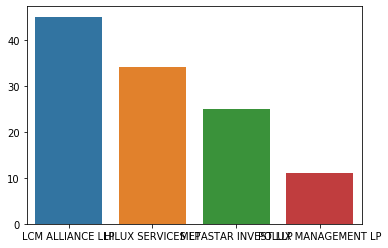

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(series_to_plot.index, series_to_plot.values)

In [26]:
top_10_payers = dkdata.groupby(['payer_name_norm'])['amount_eur'].sum().reset_index().sort_values(by='amount_eur', ascending=False).head(10)
top_10_payers

,payer_name_norm,amount_eur
145,HILUX SERVICES LP,1200261307.24
34,BAKTELEKOM MMC,1099309976.55
201,LCM ALLIANCE LLP,649262052.94
223,METASTAR INVEST LLP,347064752.93
274,POLUX MANAGEMENT LP,250392638.92
111,FABERLEX LP,128637044.16
175,JETFIELD NETWORKS LIMITED,81405862.58
292,RIVERLANE LLP,56237109.00
319,SOVER DEVELOPMENT LLP,36825586.77
103,ELEKTROMASH MMC,34906787.20


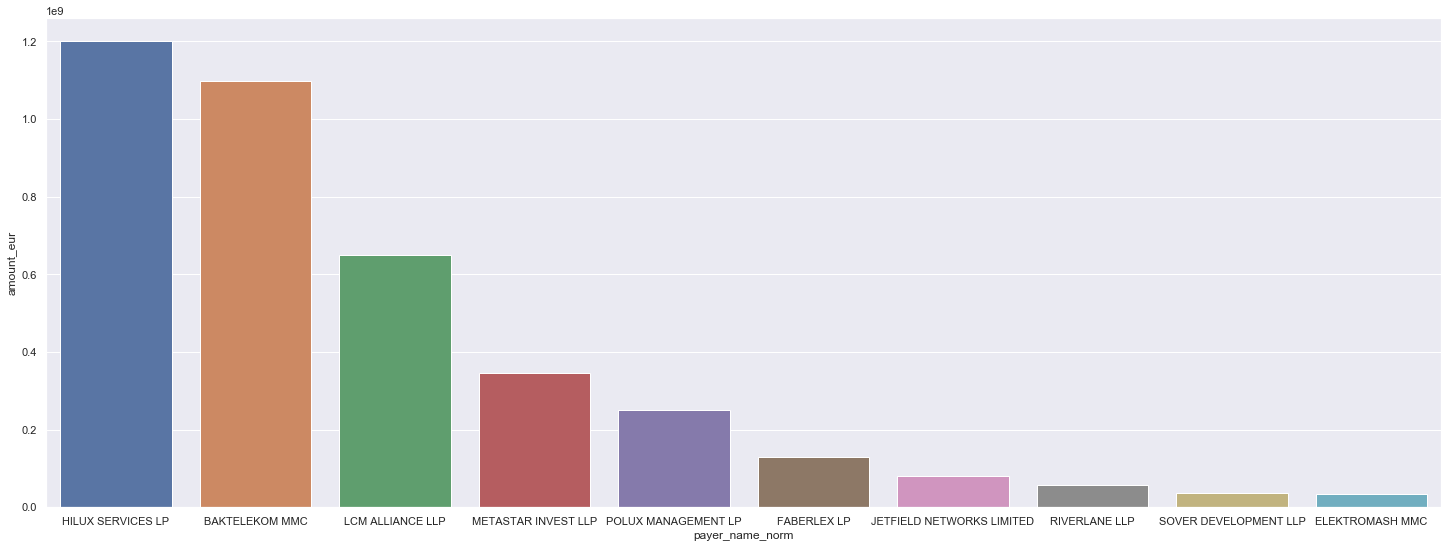

In [27]:
sns.set(rc={'figure.figsize': (25,9)})
sns.barplot(data=top_10_payers, x='payer_name_norm', y='amount_eur')

**Top most frequent clients** <br>
HILUX SERVICES LP    <br> 
METASTAR INVEST LLP <br>
LCM ALLIANCE LLP     <br> POLUX MANAGEMENT LP  <br>

In [28]:
df_hilux = dkdata[dkdata['payer_name_norm'] == 'HILUX SERVICES LP']
df_meta = dkdata[dkdata['payer_name_norm'] == 'METASTAR INVEST LLP']
df_lcm = dkdata[dkdata['payer_name_norm'] == 'LCM ALLIANCE LLP']
df_polux = dkdata[dkdata['payer_name_norm'] == 'POLUX MANAGEMENT LP']

#### HILUX SERVICES LP

In [29]:
hilux_payer = dkdata[dkdata['payer_name_norm'] == 'HILUX SERVICES LP']
hilux_bene = dkdata[dkdata['beneficiary_name_norm'] == 'HILUX SERVICES LP']

In [30]:
hilux_payer.groupby('beneficiary_name_norm')['amount_usd'].sum().sort_values(ascending = False)

beneficiary_name_norm
FABERLEX LP                                   194450177
POLUX MANAGEMENT LP                           133145902
BONDWEST LLP                                  117404211
OVERMOND LLP                                  116204951
RICHFIELD TRADING L.P.                        113327390
                                                ...    
HOTELS+RESTAURANTS MANAGEMENT                       450
HIDRO KONTROL MAK.SAN.TIC.A.S.                      333
KONSTANZE MAYER                                     279
SECIL BAYRAG                                        252
ROBERT THOMAS Metall und Elektrowerke GmbH          227
Name: amount_usd, Length: 1115, dtype: int64

In [31]:
hilux_bene.groupby('payer_name_norm')['amount_usd'].sum().sort_values(ascending = False)

payer_name_norm
BAKTELEKOM MMC                        1240116453
FABERLEX LP                            169291420
POLUX MANAGEMENT LP                     35518576
ARASH MEDICAL PRODUCTION LTD            25528639
SECURO LTD.                             20559970
                                         ...    
RICHFIELD TRADING L.P.                      5000
ZER KELEPCE IMALAT VE TICARET               4432
PLASSON LTD.                                3333
ALGAN METAL SANAYI VE TICARET A.S.           607
JX NIPPON OIL AND ENERGY (RUS) LLC             1
Name: amount_usd, Length: 61, dtype: int64

Let's dig down each transaction

In [32]:
hilux_payer[hilux_payer['beneficiary_name_norm'] == 'FABERLEX LP']

,payer_name,payer_jurisdiction,payer_account,source_file,amount_orig,id,beneficiary_type,beneficiary_core,amount_orig_currency,beneficiary_name,beneficiary_jurisdiction,investigation,beneficiary_bank_country,beneficiary_name_norm,payer_core,beneficiary_account,purpose,date,amount_usd,amount_eur,payer_type,payer_name_norm,payer_bank_country,transaction_direction,duplicated_transaction
10190,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,150.00,1346,Company,False,USD,FABERLEX LP,GB,az,33,FABERLEX LP,True,333516210006,1309105076690207 PAYMENT TO THE CONTRACT N 877...,2013-09-10,150,113.55,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
11240,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,18700.00,1507,Company,False,USD,FABERLEX LP,GB,az,33,FABERLEX LP,True,333516210006,1311075070141565 PAYMENT TO THE CONTRACT N 09 ...,2013-11-07,18700,13807.52,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
11791,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,104000.00,1637,Company,False,USD,FABERLEX LP,GB,az,33,FABERLEX LP,True,333516210006,1312035072903069 PAYMENT TO THE CONTRACT N 4 D...,2013-12-03,104000,76525.80,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
11930,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,230500.00,1688,Company,False,USD,FABERLEX LP,GB,az,33,FABERLEX LP,True,333516210006,1312095073872452 PAYMENT TO THE CONTRACT N 5 D...,2013-12-09,230500,169607.66,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
12035,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,700000.00,1752,Company,False,USD,FABERLEX LP,GB,az,EE,FABERLEX LP,True,EE683300333516210006,1312165076179688 PAYMENT TO THE CONTRACT N 5 D...,2013-12-16,700000,515077.50,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16819,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,1956.00,1115,Company,False,GBP,FABERLEX LP,GB,az,EE,FABERLEX LP,True,EE683300333516210006,1412175075348683 GROUP PAYMENT,2014-12-17,3078,2467.56,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
16846,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,16415.00,1054,Company,False,EUR,FABERLEX LP,GB,az,EE,FABERLEX LP,True,EE683300333516210006,GROUP PAYMENT,2014-12-18,20475,16415.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
16863,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Allegato 4.xml,6242.00,4570,Company,False,EUR,FABERLEX LP,GB,az,EE,FABERLEX LP,True,EE683300333516210006,GROUP PAYMENT,2014-12-19,7786,6242.00,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0
16903,HILUX SERVICES LP,GB,EE12 3300 3335 1615 0001,pdf/HILUX Account statement 30.06.12-31.12.14.xml,899700.00,4297,Company,False,USD,FABERLEX LP,GB,az,EE,FABERLEX LP,True,EE683300333516210006,1412295076830414 GROUP PAYMENT,2014-12-29,899700,721317.38,Company,HILUX SERVICES LP,EE,Outgoing Transaction,0


Apply same query to METASTAR INVEST LLP, LCM ALLIANCE LLP, POLUX MANAGEMENT LP